<a href="https://colab.research.google.com/github/jonnydubowsky/20150605_Controlling_Chaos/blob/master/Agent_Based_Simulation_of_COVID_19_Health_and_Economical_Effects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agent Based Simulation of COVID-19 Health and Economical Effects

Prof. Dr. Petrônio Cândido de Lima e Silva <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (petronio.candido@ifnmg.edu.br)


<img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-nc-sa.svg" alt="Creative Commons BY-NC-SA" />

Experiments for the post published on Towards Data Science, available at https://towardsdatascience.com/agent-based-simulation-of-covid-19-health-and-economical-effects-6aa4ae0ff397.


## Installing the package

In [0]:
!pip3 install git+https://github.com/petroniocandido/COVID19_AgentBasedSimulation.git

  Cloning https://github.com/petroniocandido/COVID19_AgentBasedSimulation.git to /tmp/pip-req-build-litjine1
  Running command git clone -q https://github.com/petroniocandido/COVID19_AgentBasedSimulation.git /tmp/pip-req-build-litjine1
  Created wheel for covid-abs: filename=covid_abs-0.0.1-cp36-none-any.whl size=21033 sha256=eb9f22527a3f825047e1e086ff2ee430c16041893072f04271e860cac320251f
  Stored in directory: /tmp/pip-ephem-wheel-cache-jie7cg8w/wheels/2c/f2/e5/b19523185aa537b4a85e38a764488fbf9f1a0d778647925527
Successfully built covid-abs


## Common imports

In [0]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import animation, rc
from IPython.display import HTML

warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Simulations

### Scenario 1 - Do Nothing

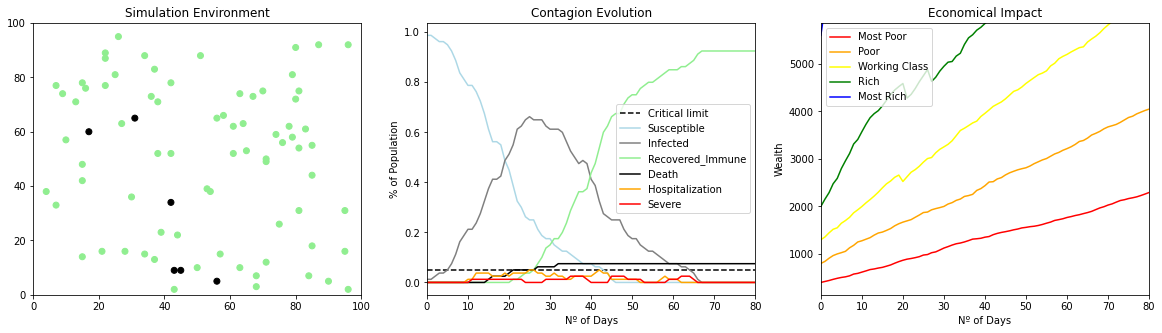

In [0]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    # Percentage of infected in initial population
    initial_infected_perc = 0.02,
    # Percentage of immune in initial population
    initial_immune_perc = 0.01,
    # Length of simulation environment       
    length=100,                       
    # Height of simulation environment
    height=100,
    # Size of population
    population_size=80,
    # Minimal distance between agents for contagion
    contagion_distance=5.,                
    # Maximum percentage of population which Healthcare System can handle simutaneously
    critical_limit=0.05,
    # Mobility ranges for agents, by Status
    amplitudes = {                        
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        }
)

anim = execute_simulation(sim, iterations=80)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim

#save_gif(anim, 'do_nothing.gif')

In [0]:
from covid_abs.experiments import batch_experiment

batch_experiment(50, 80, "scenario1.csv",
                 # Percentage of infected in initial population
                 initial_infected_perc=0.02,
                 # Percentage of immune in initial population
                 initial_immune_perc=0.01,
                 # Length of simulation environment
                 length=100,
                 # Height of simulation environment
                 height=100,
                 # Size of population
                 population_size=80,
                 # Minimal distance between agents for contagion
                 contagion_distance=5.,
                 # Maximum percentage of population which Healthcare System can handle simutaneously
                 critical_limit=0.05,
                 # Mobility ranges for agents, by Status
                 amplitudes={
                     Status.Susceptible: 5,
                     Status.Recovered_Immune: 5,
                     Status.Infected: 5
                 }
                 )

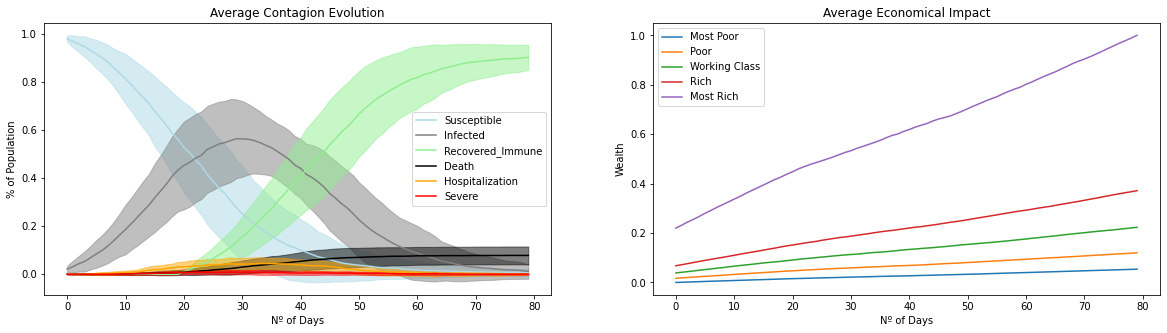

In [0]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario1.csv')

plot_batch_results(df)

### Scenario 2 - Restrict the mobility only for infected people

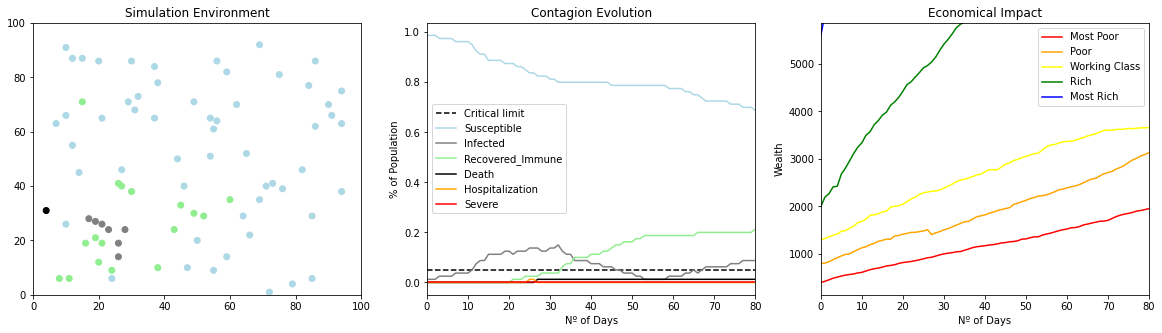

In [0]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    # Percentage of infected in initial population
    initial_infected_perc = 0.02,
    # Percentage of immune in initial population
    initial_immune_perc = 0.01,
    # Length of simulation environment       
    length=100,                       
    # Height of simulation environment
    height=100,
    # Size of population
    population_size=80,
    # Minimal distance between agents for contagion
    contagion_distance=5.,                
    # Maximum percentage of population which Healthcare System can handle simutaneously
    critical_limit=0.05,
    # Mobility ranges for agents, by Status
    amplitudes = {                        
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 0
        }
)

anim = execute_simulation(sim, iterations=80)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim

#save_gif(anim, 'do_nothing.gif')

In [0]:
from covid_abs.experiments import batch_experiment

batch_experiment(50, 80, "scenario2.csv",
                 # Percentage of infected in initial population
                 initial_infected_perc=0.02,
                 # Percentage of immune in initial population
                 initial_immune_perc=0.01,
                 # Length of simulation environment
                 length=100,
                 # Height of simulation environment
                 height=100,
                 # Size of population
                 population_size=80,
                 # Minimal distance between agents for contagion
                 contagion_distance=5.,
                 # Maximum percentage of population which Healthcare System can handle simutaneously
                 critical_limit=0.05,
                 # Mobility ranges for agents, by Status
                 amplitudes={
                     Status.Susceptible: 5,
                     Status.Recovered_Immune: 5,
                     Status.Infected: 0
                 }
                 )

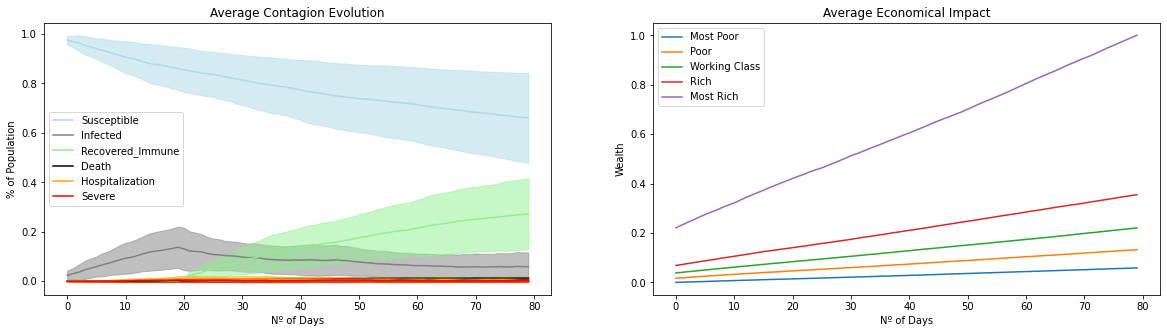

In [0]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario2.csv')

plot_batch_results(df)

### Scenario 3 - Lockdown (restrict the mobility for everybody )

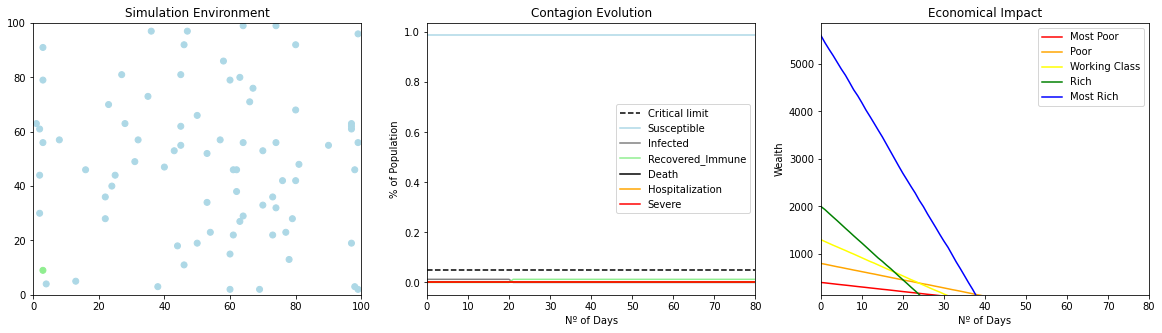

In [0]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    # Percentage of infected in initial population
    initial_infected_perc = 0.02,
    # Percentage of immune in initial population
    initial_immune_perc = 0.01,
    # Length of simulation environment       
    length=100,                       
    # Height of simulation environment
    height=100,
    # Size of population
    population_size=80,
    # Minimal distance between agents for contagion
    contagion_distance=5.,                
    # Maximum percentage of population which Healthcare System can handle simutaneously
    critical_limit=0.05,
    # Mobility ranges for agents, by Status
    amplitudes = {                        
        Status.Susceptible : 0.5, 
        Status.Recovered_Immune : 0.5, 
        Status.Infected : 0
        }
)

anim = execute_simulation(sim, iterations=80)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim

#save_gif(anim, 'do_nothing.gif')

In [0]:
from covid_abs.experiments import batch_experiment

batch_experiment(50, 80, "scenario3.csv",
                 # Percentage of infected in initial population
                 initial_infected_perc=0.02,
                 # Percentage of immune in initial population
                 initial_immune_perc=0.01,
                 # Length of simulation environment
                 length=100,
                 # Height of simulation environment
                 height=100,
                 # Size of population
                 population_size=80,
                 # Minimal distance between agents for contagion
                 contagion_distance=5.,
                 # Maximum percentage of population which Healthcare System can handle simutaneously
                 critical_limit=0.05,
                 # Mobility ranges for agents, by Status
                 amplitudes={
                     Status.Susceptible: 0.5,
                     Status.Recovered_Immune: 0.5,
                     Status.Infected: 0
                 }
                 )

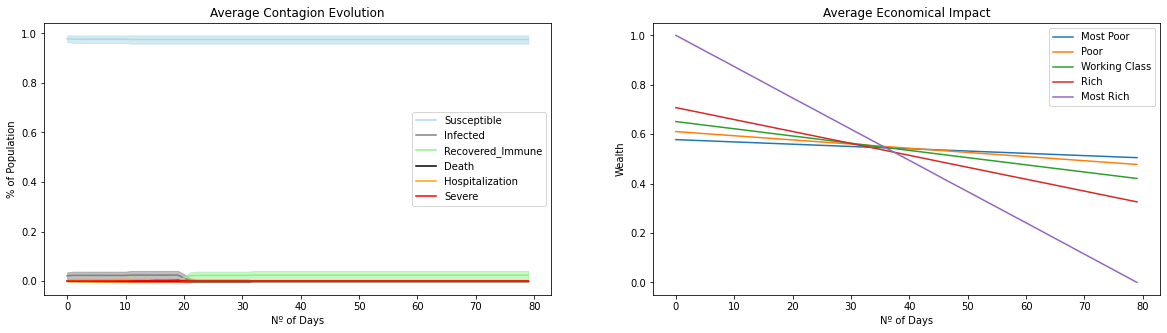

In [0]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario3.csv')

plot_batch_results(df)

### Scenario 4 - Restrict the mobility after 10% of the population being infected and release the restrictions when more then 95% is safe


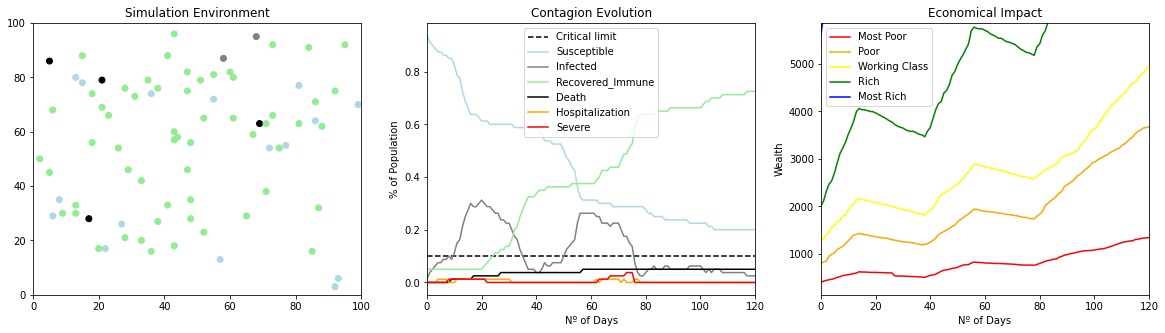

In [0]:
sim = Simulation(
    length=100,                          
    height=100,
    initial_infected_perc = 0.02,       
    population_size=80,                     
    contagion_distance=5,                
    critical_limit=.1,
    amplitudes = {                       
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        })

sim.append_trigger_simulation(lambda a : a.get_statistics()['Infected'] >= .2, 
                             'amplitudes', lambda a : {                       
        Status.Susceptible : 1.5, 
        Status.Recovered_Immune : 1.5, 
        Status.Infected : 1.5 
        } )

sim.append_trigger_simulation(lambda a : a.get_statistics()['Infected'] <= .05, 
                             'amplitudes', lambda a : {                       
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        } )


anim = execute_simulation(sim, iterations=120)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim


In [0]:
from covid_abs.experiments import batch_experiment

batch_experiment(50, 120, "scenario4.csv",
                 length=100,
                 height=100,
                 initial_infected_perc=0.02,
                 population_size=80,
                 contagion_distance=5,
                 critical_limit=.1,
                 amplitudes={
                     Status.Susceptible: 5,
                     Status.Recovered_Immune: 5,
                     Status.Infected: 5
                 },
                 triggers_simulation=[
                     {'condition': lambda a: a.get_statistics()['Infected'] >= .2,
                      'attribute': 'amplitudes',
                      'action': lambda a: {
                          Status.Susceptible: 1.5,
                          Status.Recovered_Immune: 1.5,
                          Status.Infected: 1.5
                      }},
                     {'condition': lambda a: a.get_statistics()['Infected'] <= .05,
                      'attribute': 'amplitudes',
                      'action': lambda a: {
                          Status.Susceptible: 5,
                          Status.Recovered_Immune: 5,
                          Status.Infected: 5
                      }}
                 ])


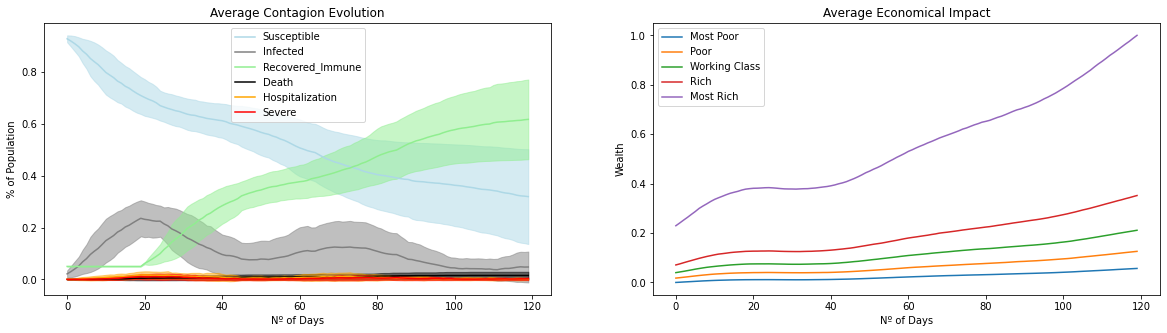

In [0]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario4.csv')

plot_batch_results(df)

### Scenario 5 - Controlled populations in contact with non-controlled populations

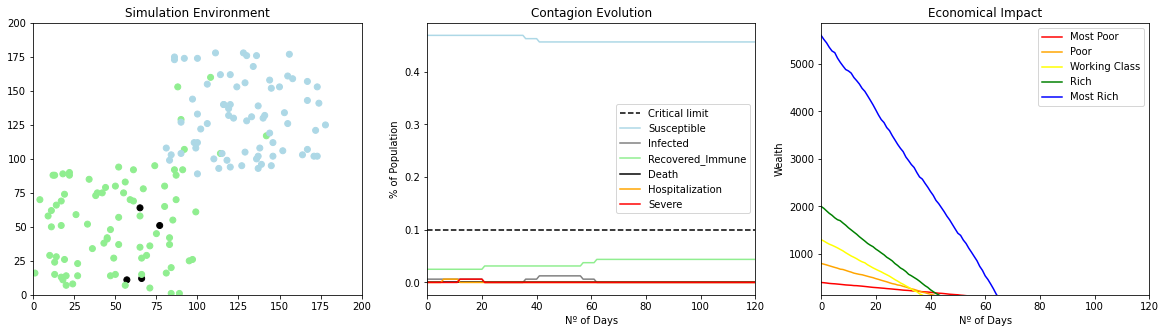

In [0]:
sim = MultiPopulationSimulation(
    length=200,                          # Largura do espaço de simulação
    height=200,
    contagion_distance=5.,
    critical_limit=.1,)

sim.append(Simulation(initial_infected_perc = 0.02,       
                     length=100,                          
                     height=100,                      
                     population_size=80,                     
                     contagion_distance=5.,                
                     critical_limit=.1,
    amplitudes = {                        
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        }), (0,0))
sim.append(Simulation(initial_infected_perc = 0.02,       
                     length=100,
    height=100,             
    population_size=80,            
    contagion_distance=5.,       
    critical_limit=.1,
    amplitudes = {               
        Status.Susceptible : 1, 
        Status.Recovered_Immune : 1, 
        Status.Infected : 1 
        }),(80,80))

anim = execute_simulation(sim, iterations=120)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim

In [0]:
from covid_abs.experiments import batch_experiment

sim1 = Simulation(initial_infected_perc=0.02,
                  length=100,
                  height=100,
                  population_size=80,
                  contagion_distance=5.,
                  critical_limit=.1,
                  amplitudes={
                      Status.Susceptible: 5,
                      Status.Recovered_Immune: 5,
                      Status.Infected: 5
                  })

sim2 = Simulation(initial_infected_perc=0.02,
                  length=100,
                  height=100,
                  population_size=80,
                  contagion_distance=5.,
                  critical_limit=.1,
                  amplitudes={
                      Status.Susceptible: 1,
                      Status.Recovered_Immune: 1,
                      Status.Infected: 1
                  })

batch_experiment(50, 80, "scenario5.csv", simulation_type=MultiPopulationSimulation,
                 length=200,
                 height=200,
                 contagion_distance=5.,
                 critical_limit=.1,
                 simulations=[sim1, sim2],
                 positions=[(0, 0), (80, 80)],
                 total_population=160
                 )

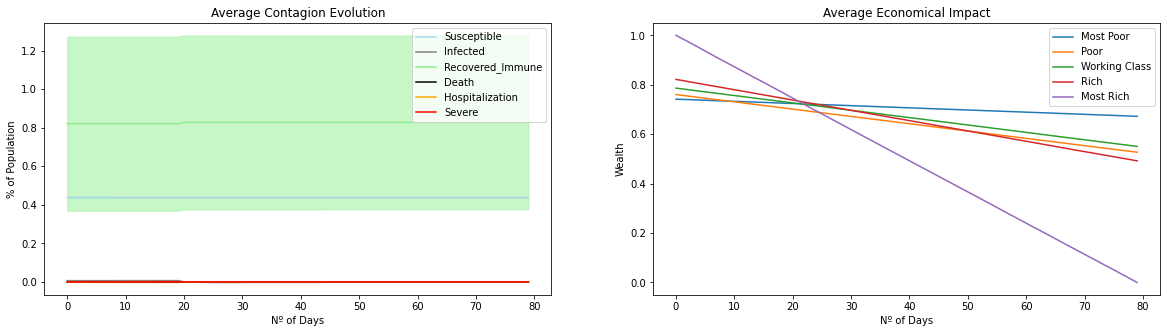

In [0]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario5.csv')

plot_batch_results(df)

### Scenario 6 - Vertical Isolation

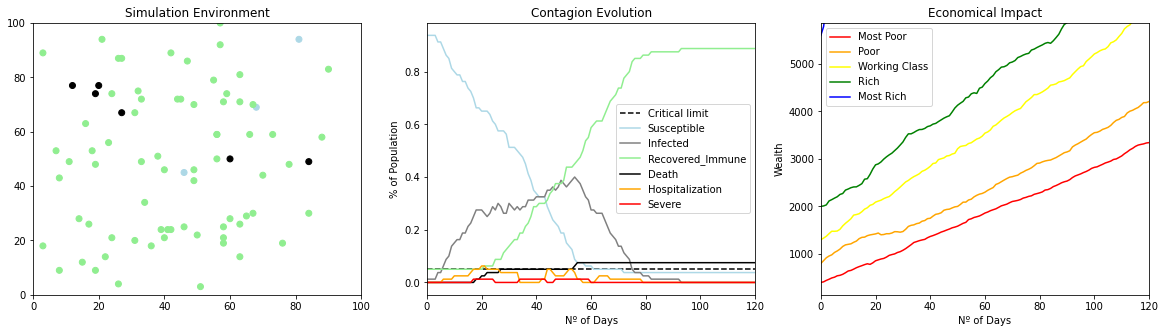

In [0]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    length=100,                          
    height=100,
    initial_infected_perc = 0.02,       
    population_size=80,                     
    contagion_distance=5,                
    critical_limit=.05,
    amplitudes = {                       
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        })

sim.append_trigger_population(lambda a : a.age >= 60, 
                             'move', lambda a : (a.x, a.y) )


anim = execute_simulation(sim, iterations=120)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim


In [0]:
from covid_abs.experiments import batch_experiment

batch_experiment(50, 80, "scenario6.csv",
                 length=100,                          
    height=100,
    initial_infected_perc = 0.02,       
    population_size=80,                     
    contagion_distance=5,                
    critical_limit=.05,
    amplitudes = {                       
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        },
        triggers_population=[
                     {'condition': lambda a : a.age >= 60,
                      'attribute': 'move',
                      'action': lambda a : (a.x, a.y) }]
                 )

[[0, 'Susceptible', 0.8875, 0.92925, 0.011887493427968744, 0.9375], [0, 'Infected', 0.0, 0.020500000000000004, 0.01218605760695394, 0.0625], [0, 'Recovered_Immune', 0.05, 0.04999999999999999, 1.3877787807814457e-17, 0.05], [0, 'Death', 0.0, 0.00025, 0.0017500000000000003, 0.0125], [0, 'Asymptomatic', 0.9875, 0.9992500000000001, 0.0029685855217594687, 1.0], [0, 'Hospitalization', 0.0, 0.0005, 0.0024494897427831774, 0.0125], [0, 'Severe', 0.0, 0.0, 0.0, 0.0], [0, 'Q1', 402.4458411624126, array([418.7353785]), array([8.52615309]), array([441.13900687])], [0, 'Q2', array([801.83230909]), array([834.17465802]), array([17.93964737]), 872.1280920294702], [0, 'Q3', array([1307.57313927]), array([1356.92316924]), array([29.1294822]), array([1439.58834334])], [0, 'Q4', array([1992.65040408]), array([2097.81085339]), array([46.22599444]), 2209.2669488328734], [0, 'Q5', array([5590.76072063]), array([5828.14495451]), array([144.28042377]), 6403.564158621376], [1, 'Susceptible', 0.875, 0.922, 0.018

Iteration            Metric  ...                  Std      Max
0            0       Susceptible  ...            0.0118875   0.9375
1            0          Infected  ...            0.0121861   0.0625
2            0  Recovered_Immune  ...          1.38778e-17     0.05
3            0             Death  ...              0.00175   0.0125
4            0      Asymptomatic  ...           0.00296859        1
..         ...               ...  ...                  ...      ...
955         79                Q1  ...  [408.3860212529529]  2658.75
956         79                Q2  ...  [808.5495009649097]  6409.34
957         79                Q3  ...  [1402.694682463522]  8887.36
958         79                Q4  ...   [2501.59554858116]  14175.9
959         79                Q5  ...  [6253.192073702218]    36684

[960 rows x 6 columns]

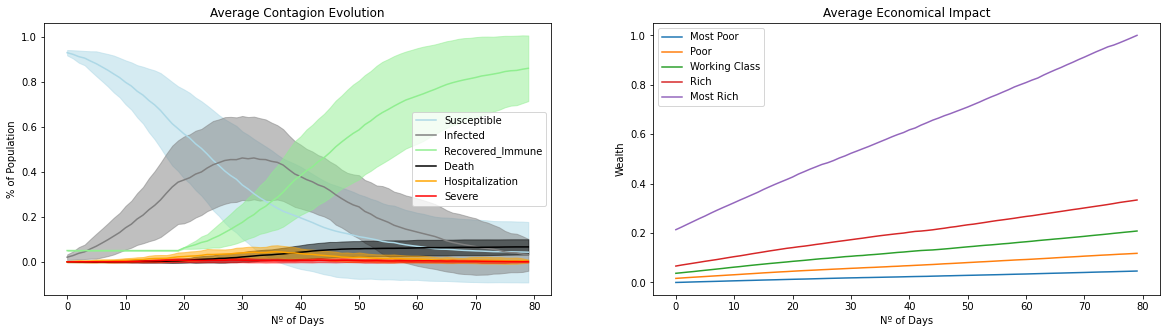

In [0]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario6.csv')

plot_batch_results(df)

### Scenario 7 - Masks for All

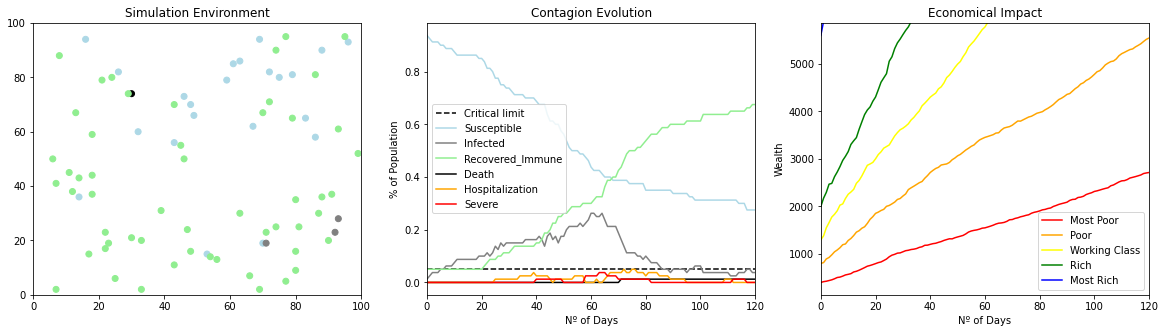

In [0]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    length=100,                          
    height=100,
    initial_infected_perc = 0.02,       
    population_size=80,                     
    contagion_distance=3,                
    critical_limit=.05,
    contagion_rate = .45, 
    amplitudes = {                       
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        })

anim = execute_simulation(sim, iterations=120)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim


In [0]:
from covid_abs.experiments import batch_experiment

batch_experiment(50, 80, "scenario7.csv",
                 length=100,                          
    height=100,
    initial_infected_perc = 0.02,       
    population_size=80,                     
    contagion_distance=3,                
    critical_limit=.05,
    contagion_rate = .45, 
    amplitudes = {                       
        Status.Susceptible : 5, 
        Status.Recovered_Immune : 5, 
        Status.Infected : 5 
        })

[[0, 'Susceptible', 0.925, 0.9367500000000001, 0.0029685855217594687, 0.9375], [0, 'Infected', 0.0125, 0.013249999999999998, 0.0029685855217594795, 0.025], [0, 'Recovered_Immune', 0.05, 0.04999999999999999, 1.3877787807814457e-17, 0.05], [0, 'Death', 0.0, 0.0, 0.0, 0.0], [0, 'Asymptomatic', 1.0, 1.0, 0.0, 1.0], [0, 'Hospitalization', 0.0, 0.0, 0.0, 0.0], [0, 'Severe', 0.0, 0.0, 0.0, 0.0], [0, 'Q1', 406.72093181707953, 422.75595387283715, 9.738014775996467, 440.57421261589144], [0, 'Q2', 802.2938100131842, 837.2719378421881, 18.835491291760363, 887.0280514990916], [0, 'Q3', 1314.0140100036158, 1367.1972403380046, 28.54568850666705, 1414.8106791328548], [0, 'Q4', 2030.3978916473734, 2116.2867691766073, 54.10119078728024, 2270.591214152134], [0, 'Q5', 5654.3762837075665, 5915.64870030162, 141.42235558128672, 6264.545670926276], [1, 'Susceptible', 0.925, 0.9357499999999999, 0.004337337893224353, 0.9375], [1, 'Infected', 0.0125, 0.014249999999999999, 0.004337337893224369, 0.025], [1, 'Recov

Iteration            Metric  ...           Std           Max
0            0       Susceptible  ...  2.968586e-03      0.937500
1            0          Infected  ...  2.968586e-03      0.025000
2            0  Recovered_Immune  ...  1.387779e-17      0.050000
3            0             Death  ...  0.000000e+00      0.000000
4            0      Asymptomatic  ...  0.000000e+00      1.000000
..         ...               ...  ...           ...           ...
955         79                Q1  ...  4.984408e+02   3457.146315
956         79                Q2  ...  8.046406e+02   5278.212882
957         79                Q3  ...  1.397807e+03   9348.653864
958         79                Q4  ...  2.315402e+03  16524.436857
959         79                Q5  ...  7.242115e+03  47350.319133

[960 rows x 6 columns]

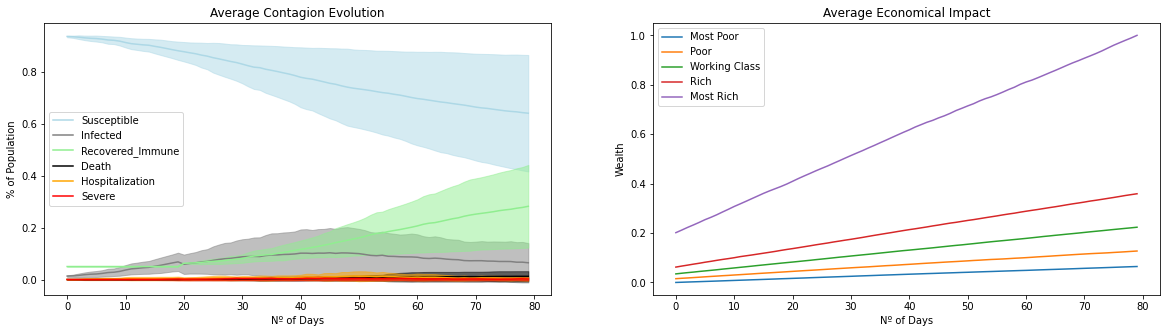

In [0]:
from covid_abs.experiments import plot_batch_results

df = pd.read_csv('scenario7.csv')

plot_batch_results(df)